In [2]:
pip install geopandas

     |████████████████████████████████| 921kB 2.8MB/s 
     |████████████████████████████████| 11.9MB 197kB/s 
     |████████████████████████████████| 10.1MB 41.1MB/s 
  Created wheel for munch: filename=munch-2.3.2-py2.py3-none-any.whl size=6614 sha256=0b07cb7c26337ec08a9a8d8a40fcf23169bae2ef33155f88cda9646790629cb3
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [3]:
import os
import json
import pandas as pd
import shutil
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap
import geopandas as gpd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df_mexican_review = pd.read_csv('/content/drive/My Drive/STAT628/data/mexican_review.csv')
df_mexican_tip =pd.read_csv('/content/drive/My Drive/STAT628/data/mexican_tip.csv')
df_mexican_info = pd.read_csv('/content/drive/My Drive/STAT628/data/mexican_info.csv')

In [0]:
df_business = pd.read_csv('/content/drive/My Drive/STAT628/data/business.csv')

In [6]:
df_mexican_review.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,6BnQwlxRn7ZuWdzninM9sQ,JSrP-dUmLlwZiI7Dp3PQ2A,cHdJXLlKNWixBXpDwEGb_A,3.0,2015-04-01 16:30:00,I love chinese food and I love mexican food. W...,1,7,1
1,S337tATeouQJdoPYyir29w,2mxBNBeFrgDszqGS5tdEHA,d_L-rfS1vT3JMzgCUGtiow,5.0,2016-07-25 03:57:19,Pick any meat on the planet and the chef will ...,0,0,0
2,j3vP8537KHvoXNHQIr3haA,Z_HE_KKT7N-WddPTzUQC7A,jScBTQtdAt-8RshaiBEHgw,5.0,2018-05-28 20:56:05,"Party of 3 ordered the fish tacos, pork belly ...",1,0,1
3,CvJy7CdHJqsZNq22fUF7hA,DAssyKNnYBenf0s1uP5iRw,dInxwF8kXVdfLEGTIBRrSw,2.0,2017-04-30 04:13:18,Employees were to busy chatting with each othe...,0,1,0
4,a6N51Ov3NEchmqsquNGtMA,qpYllTutvfoKvT5OEl7gGQ,HkbNItNrnXlNo59M0YyoMg,5.0,2016-09-30 19:51:43,I've been coming to Loco on mill since they op...,0,0,0


In [7]:
df_mexican_tip.head()

,text,date,compliment_count,business_id,user_id
0,Good chips and salsa. Loud at times. Good serv...,2011-12-26 01:46:17,0,5KheTjYPu1HcQzQFtm4_vw,jRyO2V1pA4CdVVqCIOPc1Q
1,Hey mom look at me! I'm Nancy friggen' Kerrigan!!,2014-08-24 03:56:50,1,19umlhmVB9O3njIBfRAe8g,gtwM4ijo65AN4DvXdgCu_w
2,Yay hushpuppies!,2012-10-06 02:19:39,0,OjnRf8yDGEBCoUDdchSViw,tAw16nAiAcAm8V7H1dQ2eg
3,Worst. Mexican. Ever.,2010-03-13 20:52:19,0,FgPANtTwZqXB-edLkZTXQg,Hc2tC2TDMD1wDjp8aCq7jA
4,Good Mexican food quick. Good prices and famil...,2015-01-11 22:10:08,0,gY95Q7BVB636-tAcDqC9Ww,SxcN4e5SKNhZ4wfEUbAMRA


In [8]:
df_mexican_info.head()

,business_id,name,city,latitude,longitude,star,review_count
0,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,Phoenix,33.495194,-112.028588,3.0,18
1,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,Las Vegas,36.195615,-115.040529,4.5,184
2,NPHZkn1e-tSJAbo8Zm9rYw,Burrito Bandidos,Toronto,43.666181,-79.316468,3.5,43
3,voZnDQs6Hs3YpNcS-9TALg,New Mexican Grill,Chandler,33.261325,-111.790815,4.0,84
4,jScBTQtdAt-8RshaiBEHgw,Served,Henderson,36.010745,-115.064803,4.5,664


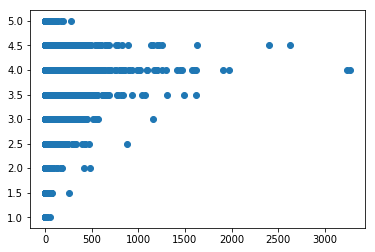

In [0]:
plt.scatter(df_mexican_info.review_count, df_mexican_info.star)

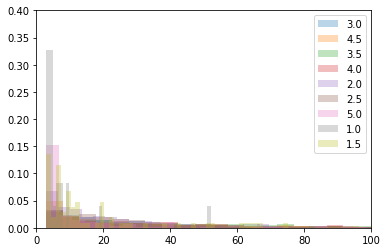

In [0]:
for i, star in enumerate(df_mexican_info.star.unique()):
    data = df_mexican_info[df_mexican_info['star'] == star]['review_count']
    data = data[data<250]
    plt.hist(data, bins = 50, alpha = 0.3, label = str(star), density = True)
plt.xlim(0, 100)
plt.ylim(0, 0.4)
plt.legend(loc='upper right')
plt.show()

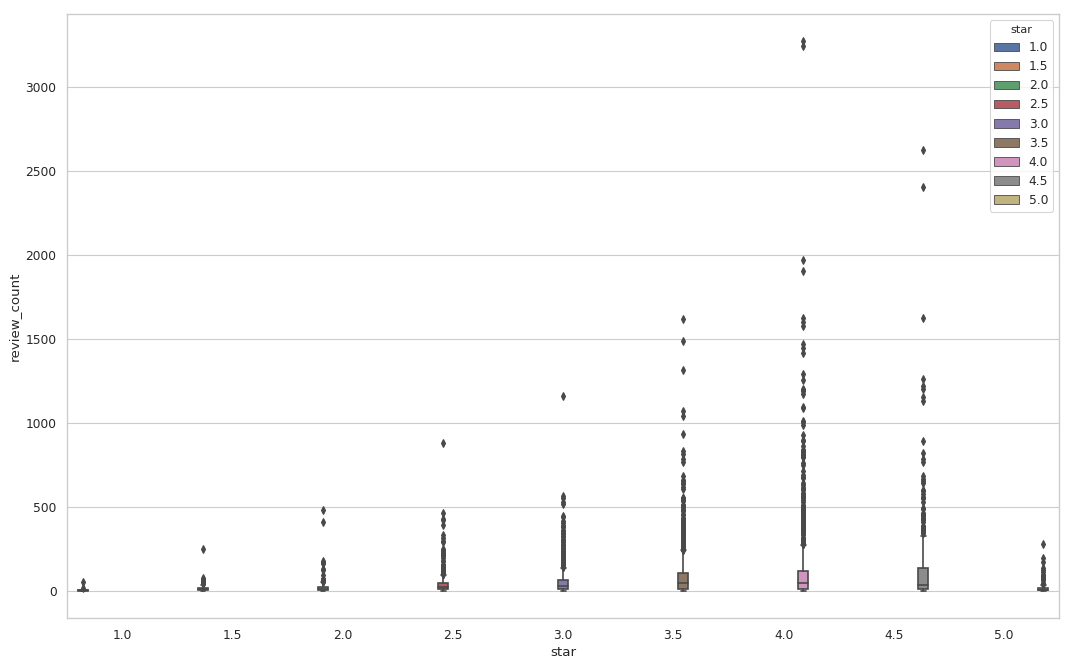

In [0]:
plt.figure(figsize=(16, 10), dpi= 80)
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(y="review_count", x="star", hue="star", data=df_mexican_info)
plt.show()

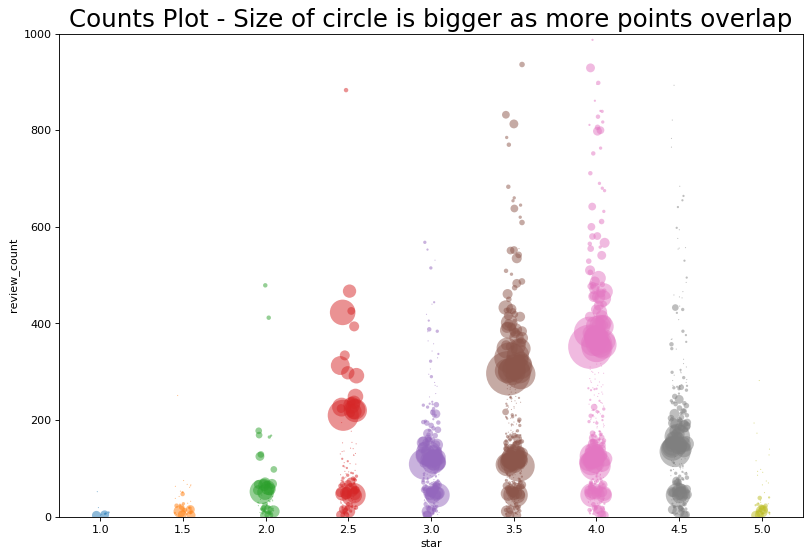

In [13]:
df_counts = df_mexican_info.groupby(['star', 'review_count']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(12,8), dpi= 80)    
sns.stripplot(df_counts.star, df_counts.review_count, size=df_counts.counts, ax=ax, alpha = 0.5)

plt.ylim(0, 1000)
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()

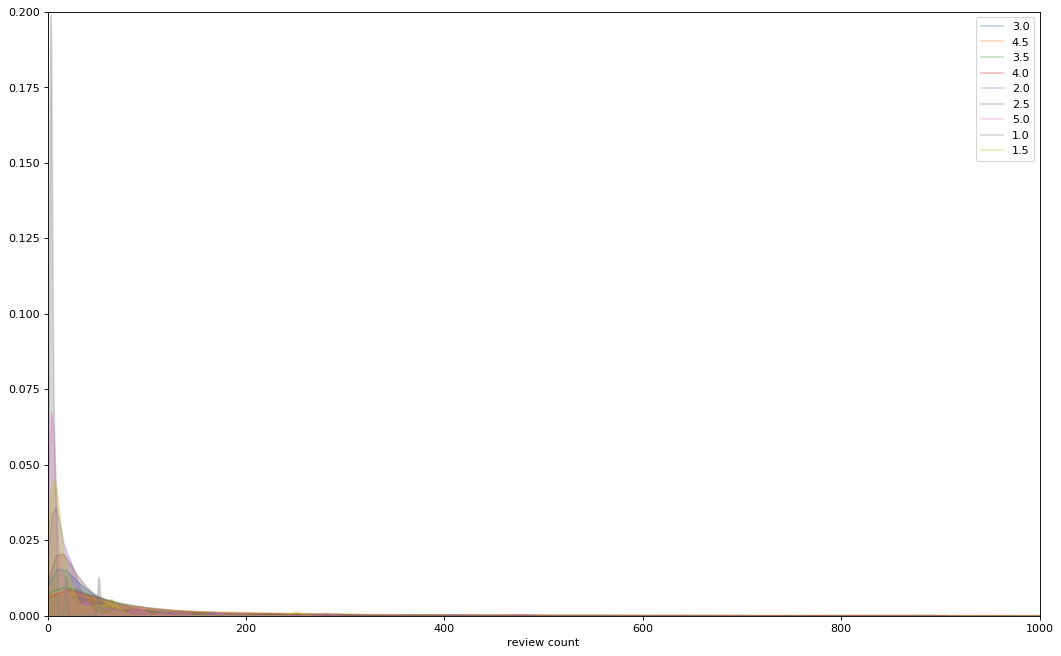

In [11]:
plt.figure(figsize=(16,10), dpi= 80)

for i, star in enumerate(df_mexican_info.star.unique()):
    data = df_mexican_info[df_mexican_info['star'] == star]['review_count']
    sns.kdeplot(data, alpha = 0.3, label = str(star), shade =True)
plt.xlim(0, 1000)
plt.ylim(0, 0.2)
plt.xlabel('review count')
plt.legend(loc='upper right')
plt.show()

In [15]:
df_mexican_review.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,6BnQwlxRn7ZuWdzninM9sQ,JSrP-dUmLlwZiI7Dp3PQ2A,cHdJXLlKNWixBXpDwEGb_A,3.0,2015-04-01 16:30:00,I love chinese food and I love mexican food. W...,1,7,1
1,S337tATeouQJdoPYyir29w,2mxBNBeFrgDszqGS5tdEHA,d_L-rfS1vT3JMzgCUGtiow,5.0,2016-07-25 03:57:19,Pick any meat on the planet and the chef will ...,0,0,0
2,j3vP8537KHvoXNHQIr3haA,Z_HE_KKT7N-WddPTzUQC7A,jScBTQtdAt-8RshaiBEHgw,5.0,2018-05-28 20:56:05,"Party of 3 ordered the fish tacos, pork belly ...",1,0,1
3,CvJy7CdHJqsZNq22fUF7hA,DAssyKNnYBenf0s1uP5iRw,dInxwF8kXVdfLEGTIBRrSw,2.0,2017-04-30 04:13:18,Employees were to busy chatting with each othe...,0,1,0
4,a6N51Ov3NEchmqsquNGtMA,qpYllTutvfoKvT5OEl7gGQ,HkbNItNrnXlNo59M0YyoMg,5.0,2016-09-30 19:51:43,I've been coming to Loco on mill since they op...,0,0,0


In [16]:
df_review_seg = df_mexican_review[['stars', 'date']]
date = df_review_seg['date'].values.tolist()
for i in range(len(date)):
    date[i] = date[i][0:7]
df_review_seg['date'] = date

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [0]:
df_counts = df_review_seg.groupby(['stars', 'date']).size().reset_index(name='counts')
date = list(df_counts.date.unique())
date.sort()
def count_review(df):
    y = []
    for i in range(len(date)):
        try:
            cnt = df[df['date']==date[i]].counts.values[0]
            y.append(cnt)
        except:
            y.append(0)
    return y

y1 = count_review(df_counts[df_counts['stars']==1.0])
y2 = count_review(df_counts[df_counts['stars']==2.0])
y3 = count_review(df_counts[df_counts['stars']==3.0])
y4 = count_review(df_counts[df_counts['stars']==4.0])
y5 = count_review(df_counts[df_counts['stars']==5.0])

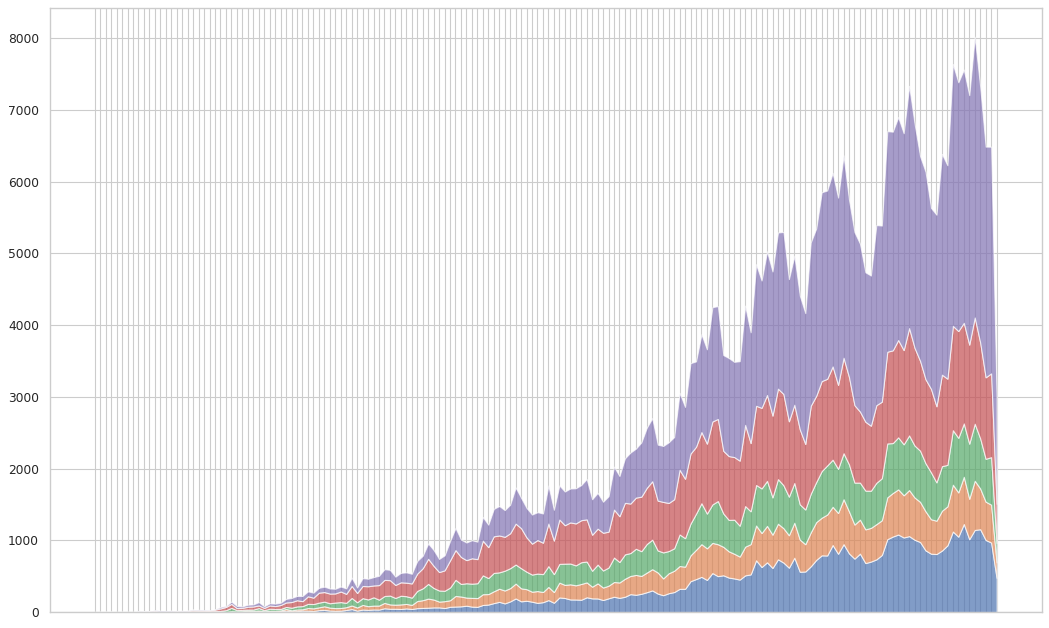

In [26]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(16,10), dpi= 80)
ax = plt.gca()
ax.stackplot(date, y1, y2, y3, y4, y5, labels = ['1', '2', '3', '4', '5'], alpha = 0.7)
for label in ax.get_xticklabels():
    label.set_visible(False)
for label in ax.get_xticklabels()[:12]:
    label.set_visible(True)
plt.show()

In [22]:
print(date)

['2004-10', '2005-03', '2005-04', '2005-05', '2005-06', '2005-07', '2005-08', '2005-09', '2005-10', '2005-11', '2005-12', '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08'

In [0]:
df_counts[df_counts['date']=='2012-02'].counts

68     129
223    149
384    250
546    468
711    430
Name: counts, dtype: int64

In [0]:
max_amount = float(df_mexican_info['review_count'].max())
hmap = folium.Map(location=[np.mean(df_mexican_info.latitude.values), np.mean(df_mexican_info.longitude.values)], zoom_start=5)
hm_wide = HeatMap( list(zip(df_mexican_info.latitude.values, 
                            df_mexican_info.longitude.values, 
                            df_mexican_info.review_count.values)),
                   min_opacity=0.05,
                   max_val=max_amount,
                   radius=20, blur=20, 
                   max_zoom=1)

hmap.add_child(hm_wide)

In [0]:
max_amount = float(max(df_business.loc[:300000].review_count.values))
hmap = folium.Map(location=[42, -80])
hm_wide = HeatMap(list(zip(df_business.loc[:30000].latitude.values, 
                           df_business.loc[:30000].longitude.values, 
                           df_business.loc[:30000].review_count.values)),
                   min_opacity=0.05,
                   max_val=max_amount,
                   radius=20, blur=20, 
                   max_zoom=1)
hmap.add_child(hm_wide)